# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city + '&appid=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | kyain seikgyi township
City not found. Skipping...
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | soller
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | mejit
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | serinhisar
Processing Record 17 of Set 1 | wladyslawowo
Processing Record 18 of Set 1 | chibougamau
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | sinop
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,96,89,1.34,NZ,1711794322
1,bethel,41.3712,-73.4140,4.05,64,40,1.34,US,1711794323
2,adamstown,-25.0660,-130.1015,23.34,65,79,11.22,PN,1711794323
3,invercargill,-46.4000,168.3500,11.68,93,91,0.89,NZ,1711794204
4,soller,39.7662,2.7152,17.14,62,100,5.76,ES,1711794323


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,96,89,1.34,NZ,1711794322
1,bethel,41.3712,-73.4140,4.05,64,40,1.34,US,1711794323
2,adamstown,-25.0660,-130.1015,23.34,65,79,11.22,PN,1711794323
3,invercargill,-46.4000,168.3500,11.68,93,91,0.89,NZ,1711794204
4,soller,39.7662,2.7152,17.14,62,100,5.76,ES,1711794323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

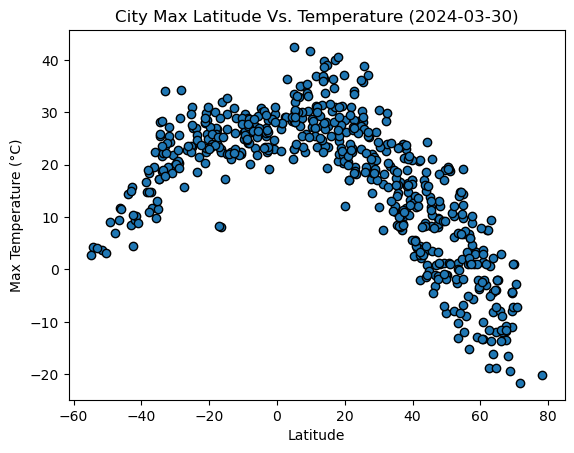

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (°C)')
ax.set_title('City Max Latitude Vs. Temperature (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

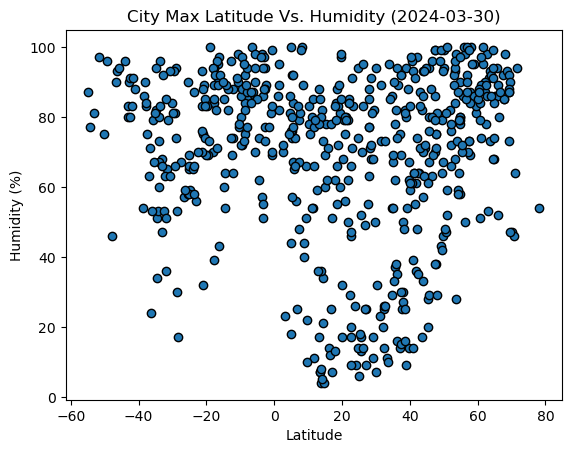

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Max Latitude Vs. Humidity (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

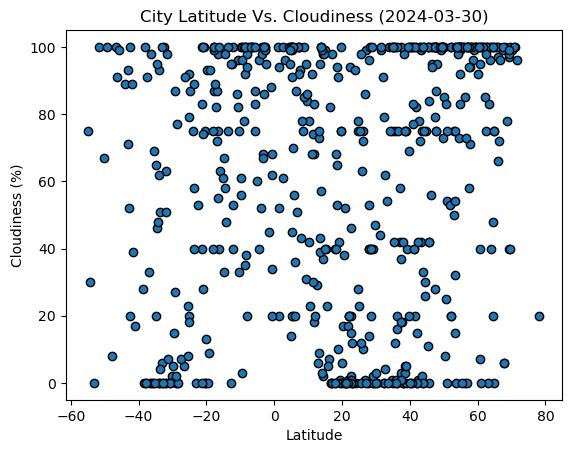

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')


# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude Vs. Cloudiness (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

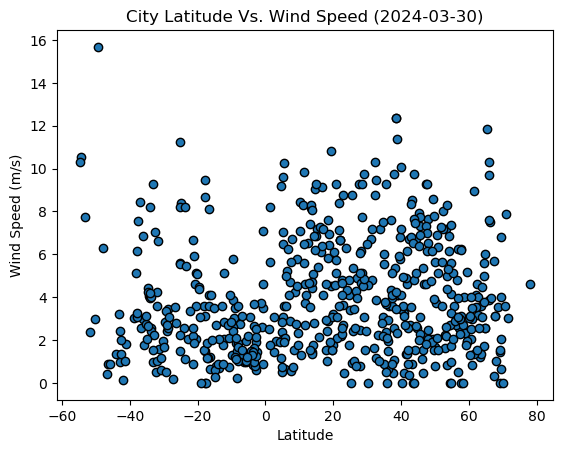

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_title('City Latitude Vs. Wind Speed (2024-03-30)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_Regreesion_plot(x_values, y_values, x_label, y_label, x_line_position, y_line_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r')
    plt.annotate(line_eq,(x_line_position,y_line_position),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {rvalue}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,4.05,64,40,1.34,US,1711794323
4,soller,39.7662,2.7152,17.14,62,100,5.76,ES,1711794323
5,college,64.8569,-147.8028,-2.01,68,75,2.57,US,1711794323
6,saipan,15.1355,145.7010,27.39,78,40,7.20,MP,1711794324
9,mejit,10.2753,170.8646,27.18,83,78,8.42,MH,1711794324


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.34,96,89,1.34,NZ,1711794322
2,adamstown,-25.0660,-130.1015,23.34,65,79,11.22,PN,1711794323
3,invercargill,-46.4000,168.3500,11.68,93,91,0.89,NZ,1711794204
7,east london,-33.0153,27.9116,23.52,68,0,9.26,ZA,1711794324
8,saldanha,-33.0117,17.9442,34.03,47,6,0.98,ZA,1711794324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8716569113923416


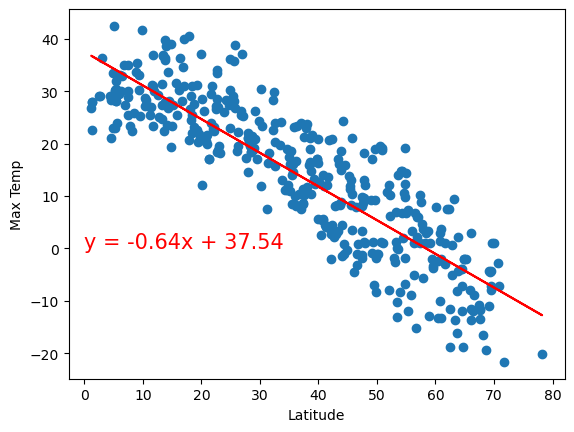

In [16]:
# Linear regression on Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',0,0)

The r-value is: 0.6906088750844726


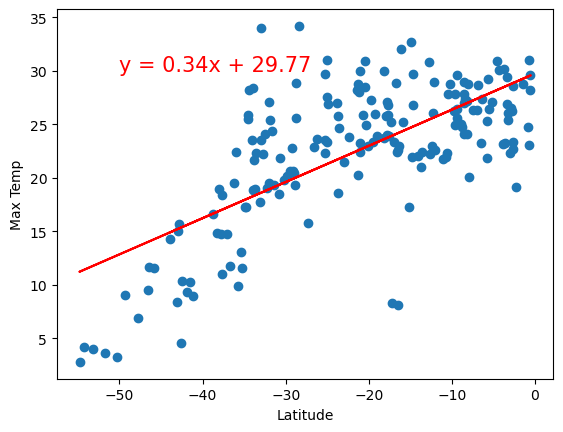

In [19]:
# Linear regression on Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp',-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.28883103241873587


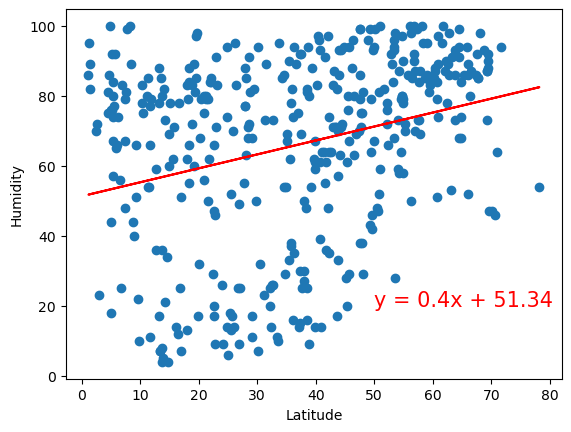

In [21]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity',50,20)

The r-value is: 0.1690007520517124


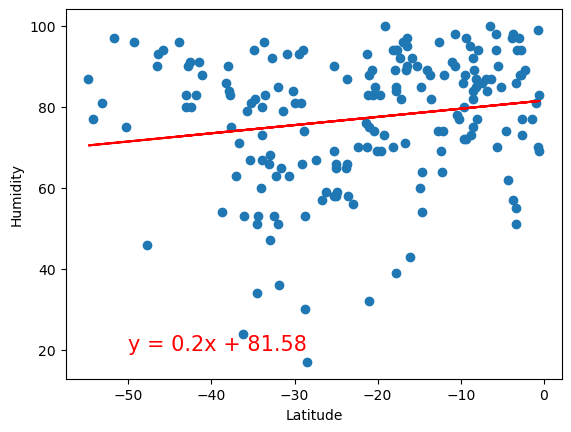

In [22]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity',-50,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2253612898064833


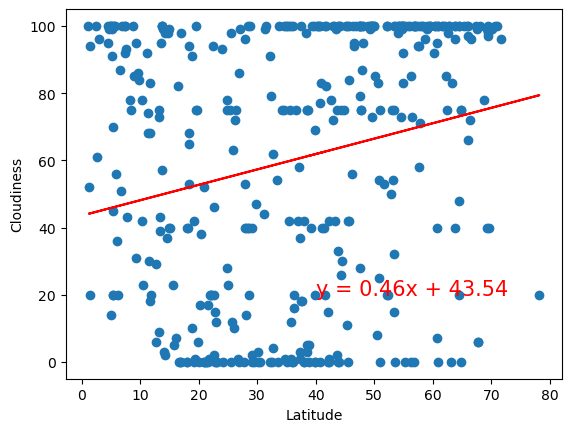

In [23]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',40,20)

The r-value is: 0.3266447076388394


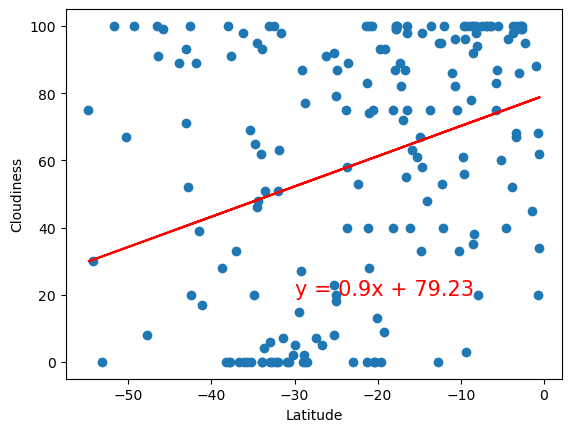

In [24]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness',-30,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09711379353834058


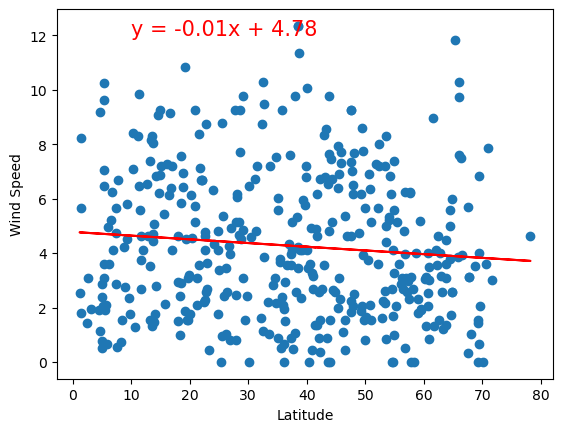

In [25]:
# Northern Hemisphere
linear_Regreesion_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',10,12)

The r-value is: -0.29690249883310327


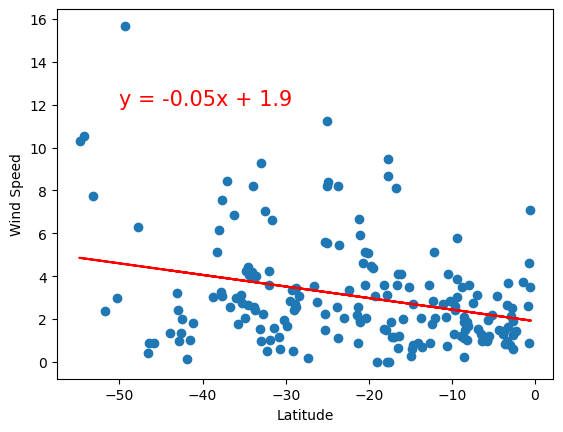

In [27]:
# Southern Hemisphere
linear_Regreesion_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed',-50,12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE